In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-hike-data/Mobile dataset.csv


> * The dataset is about price range of smartphones according to its specification

> # Loading Packages

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

> # Data 

* brand : brand name
* model : model name
* base_color : color variant
* processor : processor
* Screen_size : screen size ratio
* ROM : ROM size
* RAM : RAM size
* display_size : display type
* num_rear_camera : rear camera count
* num_front_camera : Front camera count
* battery_capacity : battery capacity
* rating
* num_of_ratings : rating count
* sales_price : product price
* discount percent
* sales 

> # Reading Data 

In [3]:
df=pd.read_csv('/kaggle/input/mobile-price-hike-data/Mobile dataset.csv')
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


> # Dimension of Data 

In [4]:
df.shape

(430, 16)

Data contains 430 rows and 16 columns

In [5]:
org_data=df.copy()

> # Features of Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

as we can see there are 5 categorical and 11 numeric variables

> # Missing Data 

In [7]:
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

0 null values in this dataset

In [8]:
df['sales']=df['sales'].astype(int)

In [9]:
cat_data=df.select_dtypes(include=[np.object])
cat_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,brand,model,base_color,processor,screen_size
0,Apple,iPhone SE,Black,Water,Very Small
1,Apple,iPhone 12 Mini,Red,Ceramic,Small
2,Apple,iPhone SE,Red,Water,Very Small
3,Apple,iPhone XR,Others,iOS,Medium
4,Apple,iPhone 12,Red,Ceramic,Medium


In [10]:
num_data=df.select_dtypes(include=[np.number])
num_data.head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5


In [11]:
df['brand'].value_counts()

Realme     138
Samsung    119
Xiaomi      61
Apple       56
Poco        56
Name: brand, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

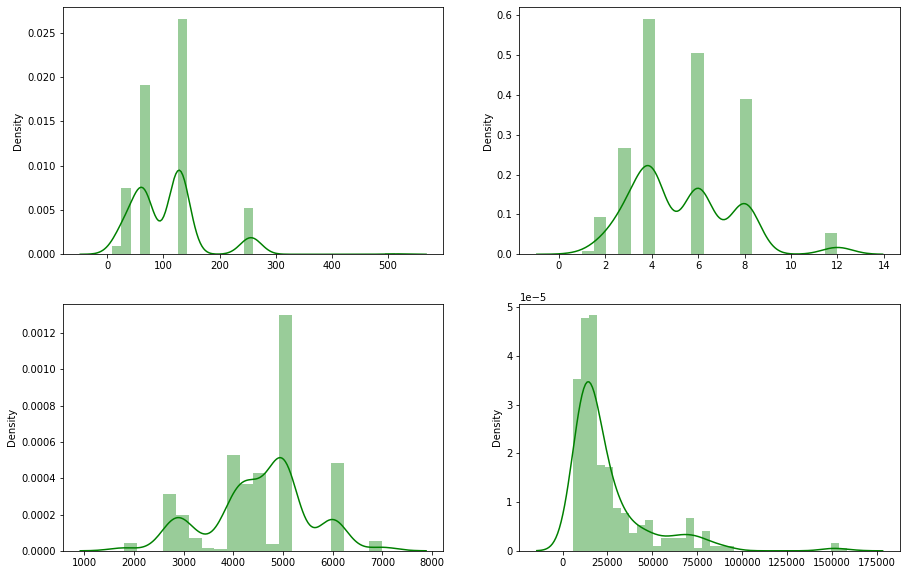

In [12]:
cols=[['ROM','RAM'],['battery_capacity','sales_price']]
figure,axes=plt.subplots(2,2,figsize=(15,10))
for i in range (len(cols)):
    for j in range (len(cols)):
        sns.distplot(x=df[cols[i][j]],ax=axes[i,j],color='g')

<AxesSubplot:xlabel='brand,ratings'>

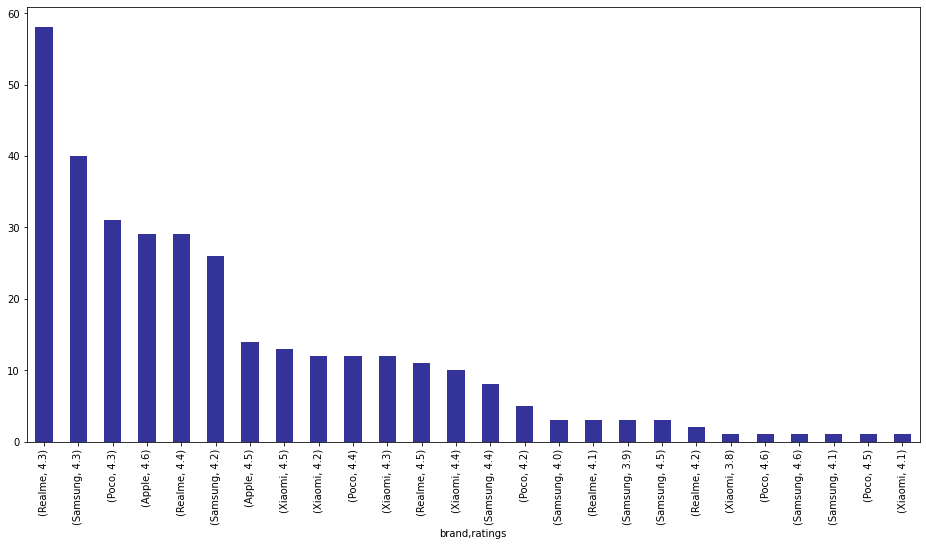

In [13]:
rom=df[(df['ROM']==64)|(df['ROM']==128)]
plt.figure(figsize=(16,8))
rom.groupby(['brand'])['ratings'].value_counts().sort_values(ascending=False).plot(kind='bar',cmap='terrain')

* smartphones with ROM 64 or 128 mostly have ratings above 4

<AxesSubplot:xlabel='brand,ROM,sales_price'>

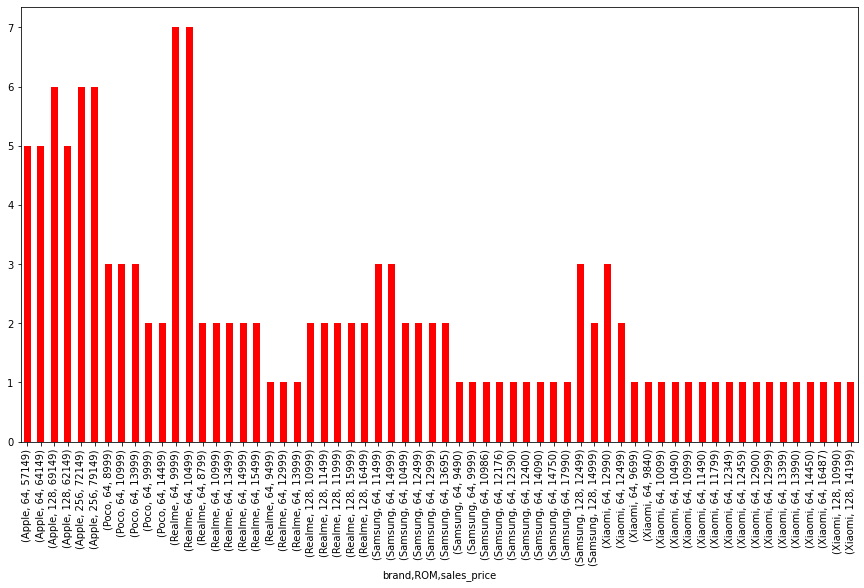

In [14]:
r=df[(df['RAM']==4)]
plt.figure(figsize=(15,8))
r.groupby(['brand','ROM'])['sales_price'].value_counts().plot(kind='bar',cmap='prism')

* smartphones containing 4 RAM are mostly have 64 ROM

<AxesSubplot:xlabel='brand,ratings,sales_price'>

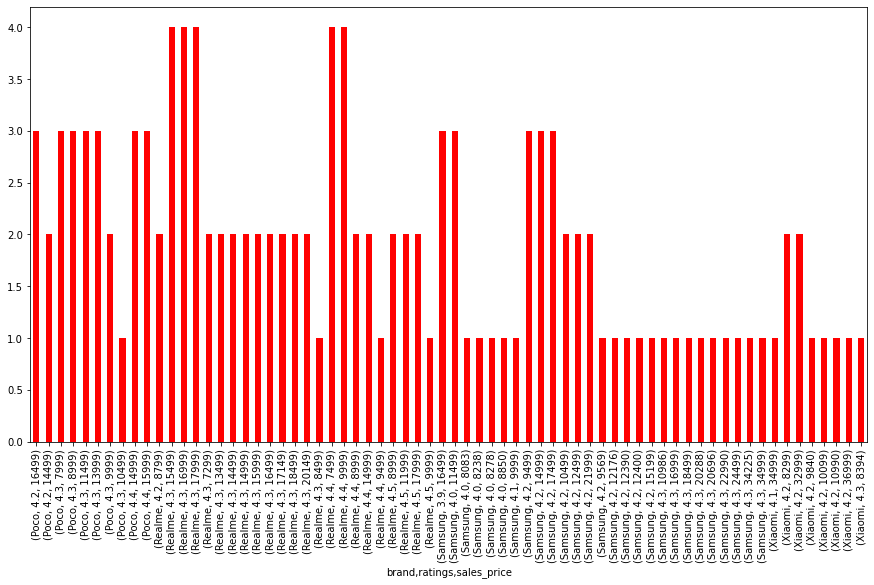

In [15]:
plt.figure(figsize=(15,8))
b=df[df['battery_capacity']==5000]
b.groupby(['brand','ratings'])['sales_price'].value_counts().plot(kind='bar',cmap='prism')

* Smartphones having 5000 battery capacity are of brand realme,samsung,xiaomi and poco and there rating is above 4 and prices are between 7999 to 36999

<AxesSubplot:xlabel='brand,battery_capacity'>

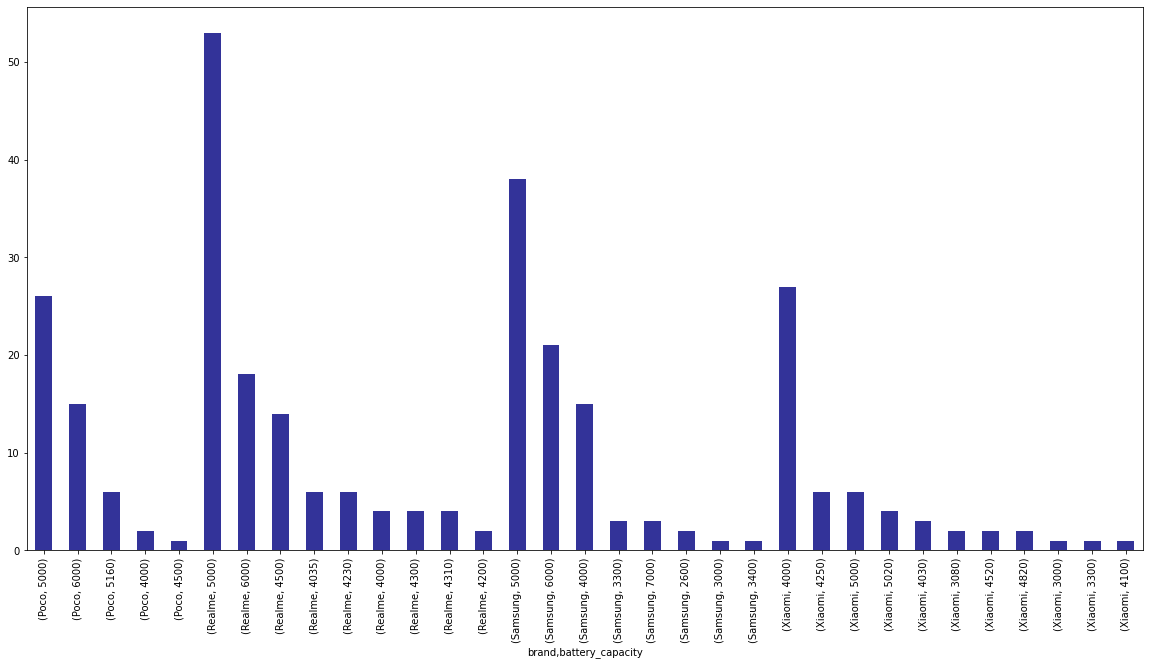

In [16]:
plt.figure(figsize=(20,10))
price=df[df['sales_price']<25000]
price.groupby(['brand'])['battery_capacity'].value_counts().plot(kind= 'bar',cmap='terrain')

* mobiles below price 25000 carries battery capacity between 3000 to 6000 mAh and brands like poco,realme,xiaomi,samsung.

<AxesSubplot:xlabel='brand', ylabel='count'>

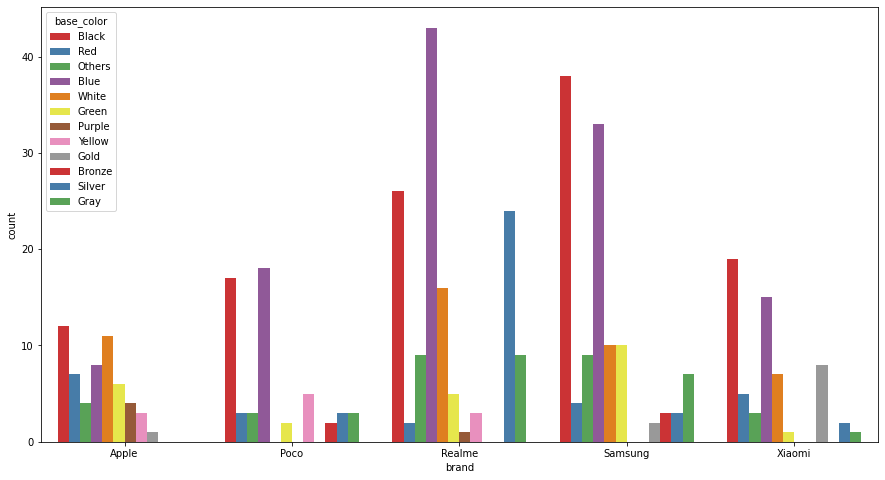

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['brand'],hue=df['base_color'],palette='Set1')

* Populor colours in every brand are blue and black

<AxesSubplot:xlabel='brand', ylabel='ratings'>

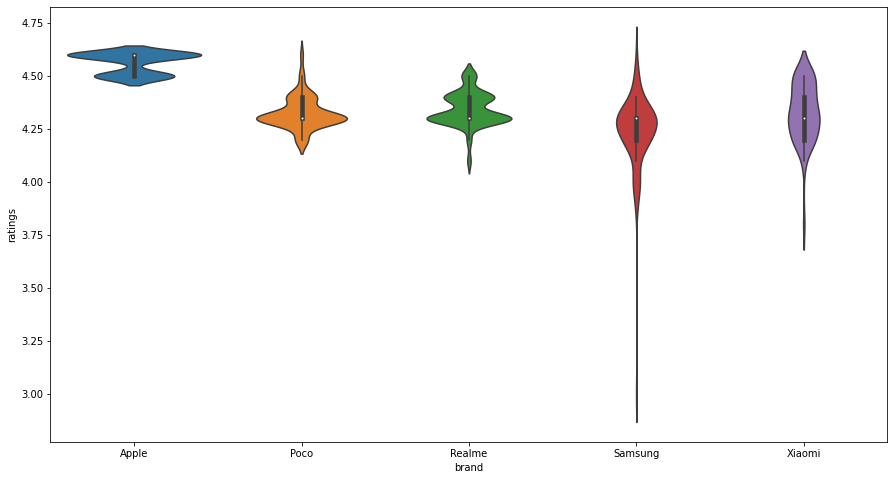

In [18]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df['brand'],y=df['ratings'])

* Brand Apple is having high ratings among all brands

<AxesSubplot:xlabel='brand', ylabel='sales_price'>

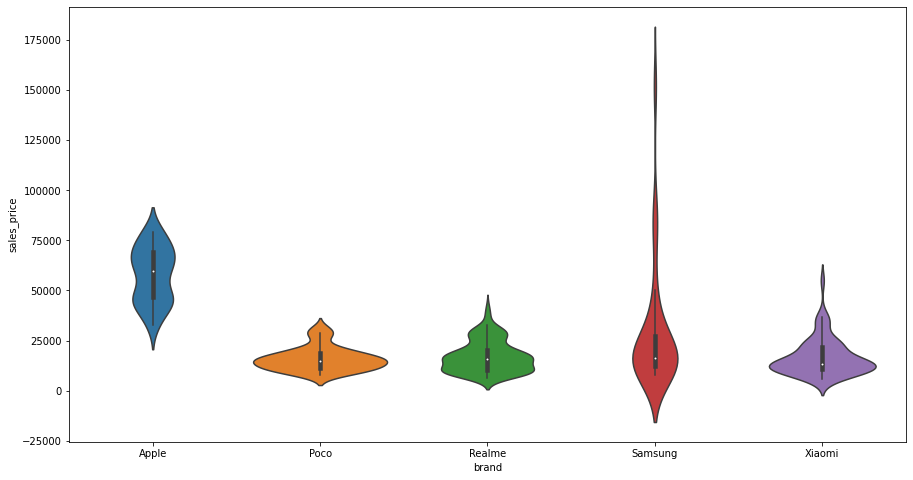

In [19]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df['brand'],y=df['sales_price'])

* the prices of smartphones from brand Apple are higher 

<AxesSubplot:xlabel='brand,model,screen_size'>

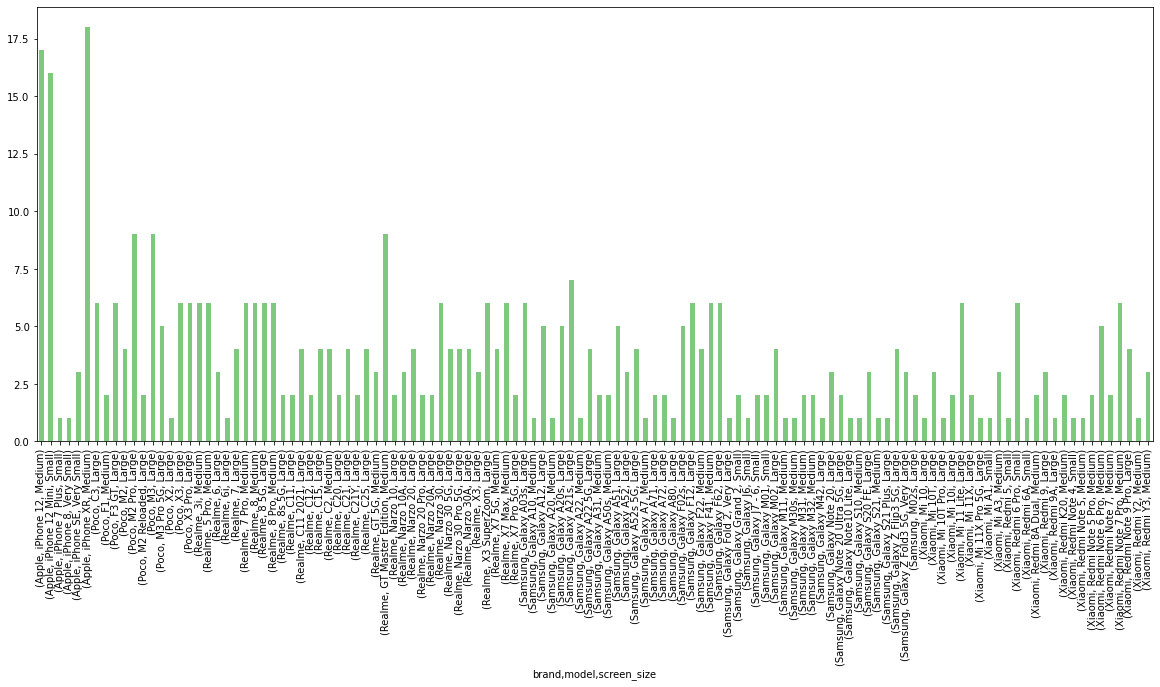

In [20]:
plt.figure(figsize=(20,8))
df.groupby(['brand','model'])['screen_size'].value_counts().plot(kind='bar',cmap='Accent')

<AxesSubplot:xlabel='brand,discount_percent'>

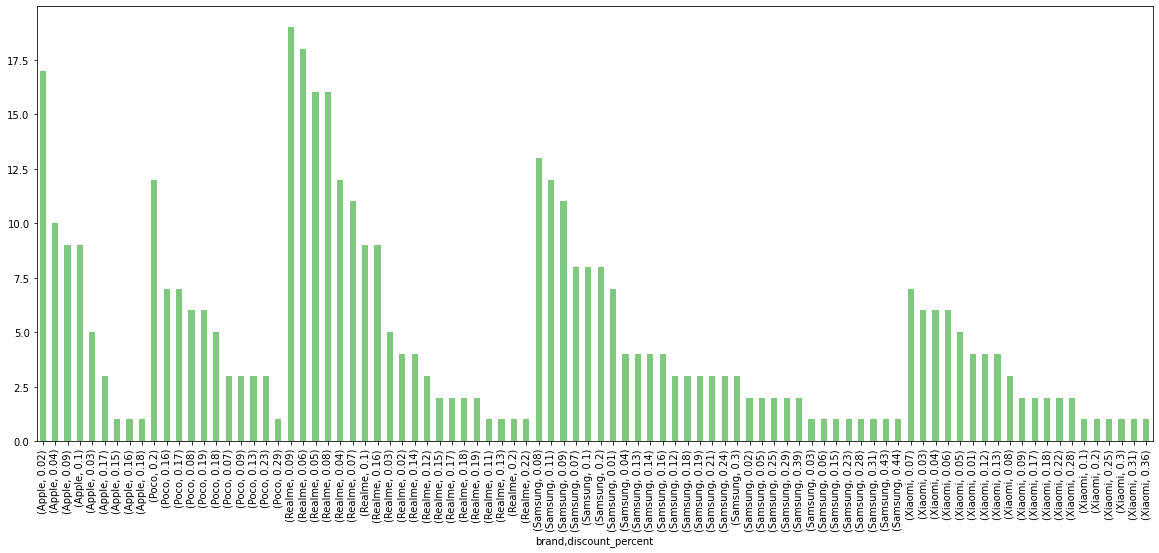

In [21]:
plt.figure(figsize=(20,8))
df.groupby(['brand'])['discount_percent'].value_counts().plot(kind='bar',cmap='Accent')


<AxesSubplot:xlabel='brand,model'>

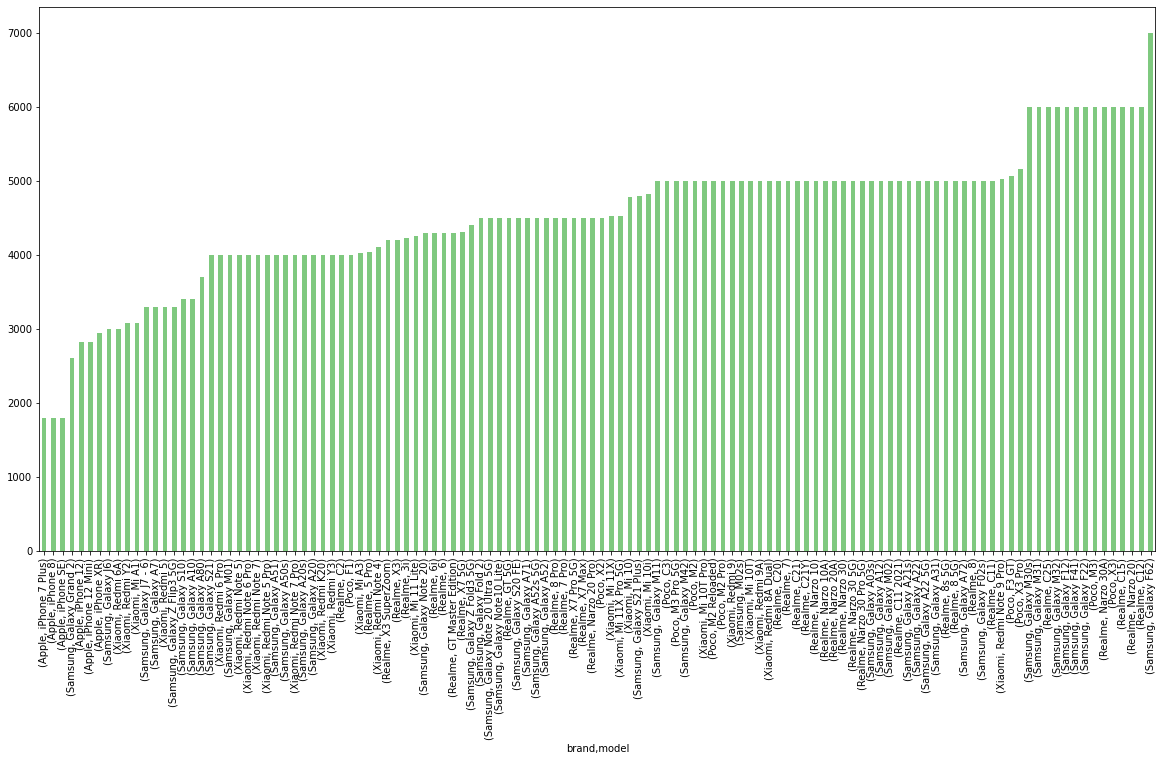

In [22]:
plt.figure(figsize=(20,10))
df.groupby(['brand','model'])['battery_capacity'].mean().sort_values().plot(kind='bar',cmap='Accent')

<AxesSubplot:xlabel='brand', ylabel='count'>

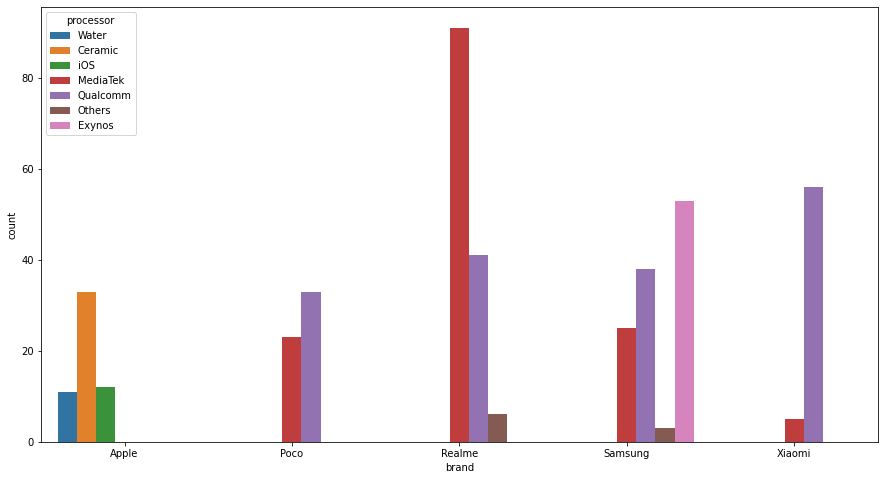

In [23]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['brand'],hue=df['processor'])

* brand Apple have different processors like Water,Ceramic and iOS 
* other brands like Poco,Realme,Xiaomi,Samsung have alike processors such as Mediatek,Qualcomm
* most smartphones from brand Samsung carries Exynos processor

<AxesSubplot:xlabel='brand'>

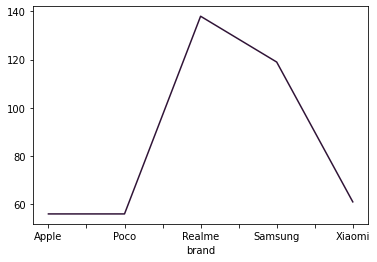

In [24]:
df.groupby('brand')['model'].count().plot(cmap='twilight_shifted')

* Realme brand have many models.
* Apple and Poco have limited models.

<AxesSubplot:xlabel='sales_price', ylabel='num_of_ratings'>

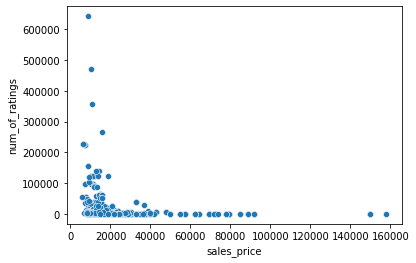

In [25]:
sns.scatterplot(x=df['sales_price'],y=df['num_of_ratings'])

* number of ratings are increasing with decreasing sales price

<AxesSubplot:xlabel='brand', ylabel='display_size'>

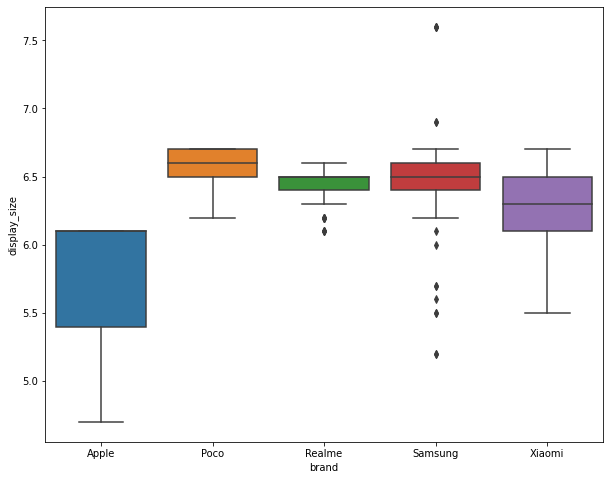

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x=df['brand'],y=df['display_size'])

* smartphones from apple have display size below 6 inches.
* smartphones from other brand have display size above 6 inches.

<AxesSubplot:ylabel='ratings'>

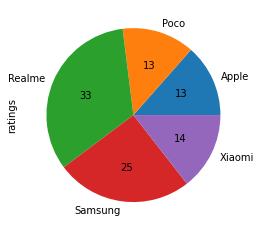

In [27]:
high_rating=df[df['ratings']>4]
high_rating.groupby('brand')['ratings'].count().plot(kind='pie',autopct='%.f')

* Realme possesses high ratings in comparison of otther brands

In [28]:
df

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,Qualcomm,Small,32,3,5.8,2,1,4000,4.3,1870,7999,0.30,1
426,Xiaomi,Redmi 6 Pro,Red,Qualcomm,Small,64,4,5.8,2,1,4000,4.3,1783,9699,0.28,1
427,Xiaomi,Mi 11 Lite,Others,Qualcomm,Large,128,6,6.5,3,1,4250,4.2,1554,21999,0.12,3
428,Xiaomi,Redmi 8A Dual,Blue,Qualcomm,Medium,32,3,6.2,2,1,5000,4.2,8161,8299,0.07,6
